In [17]:
# Import libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def print_rates(cm, classes):
    success_rate = []
    for i in range(len(cm)):
        success_rate.append(cm[i][i] / np.sum(cm[i]))
    
    x_pos = np.arange(len(classes))
    
    fig, ax = plt.subplots()    
    plt.bar(x_pos, success_rate)
    plt.xticks(x_pos, classes, rotation=45)
    ax.yaxis.set_visible(False)
    ax.axis([-1, 6, 0, 1.1])
    plt.title('Success rate for each class')
    #plt.ylabel('Success rate')
    for i, v in enumerate(success_rate):
        ax.text(i, v+0.01, format(success_rate[i], '.2f'),
                horizontalalignment="center",
                color='black', fontweight='bold')    
    plt.show()

In [18]:
# read the data set
data_set = pd.read_csv('WISDM_ar_v1.1_transformed.csv')
X = data_set.iloc[:, 2:-1].values # eliminate not important colums 
y = data_set.iloc[:,-1].values

In [19]:
# Eliminate NaN entries
col_mean = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_mean, inds[1])

In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [26]:
# Split the dataset into the Training set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD


# I added Dropout because there was too much overfitting
# The number of neurons was chosen to be approximately equal to the number of 'inputs' (features) 43
# It would be interessant to try different activation functions
nnet = Sequential()
nnet.add(Dropout(0.2, input_shape=(43,)))
nnet.add(Dense(units=50, kernel_initializer="normal", activation='relu', kernel_constraint=maxnorm(3)))
nnet.add(Dense(units=20, kernel_initializer="normal", activation='sigmoid', kernel_constraint=maxnorm(3)))
nnet.add(Dense(units=6, activation='softmax'))

# As I notice a huge overfitting in the training set
# it seems a good idea to increase L2 regularization
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
nnet.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [27]:
from keras.utils import to_categorical
classes, y_train = np.unique(y_train, return_inverse=True)
y_train = to_categorical(y_train, len(classes))

In [28]:
nnet.fit(X_train, y_train,
         batch_size=30,
         epochs=1000)

Epoch 1/1000
4876/4876 [==============================] - 1s 165us/step - loss: 0.9420 - acc: 0.6548
Epoch 2/1000
4876/4876 [==============================] - 1s 112us/step - loss: 0.6822 - acc: 0.7475
Epoch 3/1000
4876/4876 [==============================] - 1s 110us/step - loss: 0.6337 - acc: 0.7580
Epoch 4/1000
4876/4876 [==============================] - 1s 114us/step - loss: 0.5942 - acc: 0.7697
Epoch 5/1000
4876/4876 [==============================] - 1s 117us/step - loss: 0.5855 - acc: 0.7760
Epoch 6/1000
4876/4876 [==============================] - 1s 116us/step - loss: 0.5635 - acc: 0.7750
Epoch 7/1000
4876/4876 [==============================] - 1s 122us/step - loss: 0.5463 - acc: 0.7845
Epoch 8/1000
4876/4876 [==============================] - 1s 107us/step - loss: 0.5616 - acc: 0.7808
Epoch 9/1000
4876/4876 [==============================] - 1s 122us/step - loss: 0.5174 - acc: 0.7970
Epoch 10/1000
4876/4876 [==============================] - 1s 132us/step - loss: 0.5315 - a

4876/4876 [==============================] - 0s 66us/step - loss: 0.4419 - acc: 0.8288
Epoch 82/1000
4876/4876 [==============================] - 0s 60us/step - loss: 0.4320 - acc: 0.8318
Epoch 83/1000
4876/4876 [==============================] - 0s 61us/step - loss: 0.4449 - acc: 0.8238
Epoch 84/1000
4876/4876 [==============================] - 0s 60us/step - loss: 0.4205 - acc: 0.8322
Epoch 85/1000
4876/4876 [==============================] - 0s 60us/step - loss: 0.4258 - acc: 0.8324
Epoch 86/1000
4876/4876 [==============================] - 0s 65us/step - loss: 0.4287 - acc: 0.8300
Epoch 87/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4336 - acc: 0.8283
Epoch 88/1000
4876/4876 [==============================] - 0s 61us/step - loss: 0.4281 - acc: 0.8341
Epoch 89/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4421 - acc: 0.8294
Epoch 90/1000
4876/4876 [==============================] - 0s 63us/step - loss: 0.4274 - acc: 0.8285
Epoc

4876/4876 [==============================] - 0s 64us/step - loss: 0.4288 - acc: 0.8374
Epoch 162/1000
4876/4876 [==============================] - 0s 58us/step - loss: 0.4342 - acc: 0.8249
Epoch 163/1000
4876/4876 [==============================] - 0s 57us/step - loss: 0.4287 - acc: 0.8337
Epoch 164/1000
4876/4876 [==============================] - 0s 57us/step - loss: 0.4084 - acc: 0.8341
Epoch 165/1000
4876/4876 [==============================] - 0s 58us/step - loss: 0.4319 - acc: 0.8314
Epoch 166/1000
4876/4876 [==============================] - 0s 57us/step - loss: 0.4276 - acc: 0.8302
Epoch 167/1000
4876/4876 [==============================] - 0s 59us/step - loss: 0.3951 - acc: 0.8445
Epoch 168/1000
4876/4876 [==============================] - 0s 59us/step - loss: 0.4278 - acc: 0.8312
Epoch 169/1000
4876/4876 [==============================] - 0s 60us/step - loss: 0.4191 - acc: 0.8402
Epoch 170/1000
4876/4876 [==============================] - 0s 59us/step - loss: 0.4263 - acc: 0.

4876/4876 [==============================] - 0s 62us/step - loss: 0.4026 - acc: 0.8454
Epoch 242/1000
4876/4876 [==============================] - 0s 61us/step - loss: 0.4418 - acc: 0.8253
Epoch 243/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4280 - acc: 0.8343
Epoch 244/1000
4876/4876 [==============================] - 0s 61us/step - loss: 0.4186 - acc: 0.8368
Epoch 245/1000
4876/4876 [==============================] - 0s 63us/step - loss: 0.4238 - acc: 0.8376
Epoch 246/1000
4876/4876 [==============================] - 0s 63us/step - loss: 0.4072 - acc: 0.8429
Epoch 247/1000
4876/4876 [==============================] - 0s 64us/step - loss: 0.4097 - acc: 0.8409
Epoch 248/1000
4876/4876 [==============================] - 0s 67us/step - loss: 0.4202 - acc: 0.8376
Epoch 249/1000
4876/4876 [==============================] - 0s 64us/step - loss: 0.4134 - acc: 0.8388
Epoch 250/1000
4876/4876 [==============================] - 0s 65us/step - loss: 0.4263 - acc: 0.

4876/4876 [==============================] - 0s 86us/step - loss: 0.4232 - acc: 0.8406
Epoch 322/1000
4876/4876 [==============================] - 0s 83us/step - loss: 0.4150 - acc: 0.8275
Epoch 323/1000
4876/4876 [==============================] - 0s 79us/step - loss: 0.4016 - acc: 0.8445
Epoch 324/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4178 - acc: 0.8398
Epoch 325/1000
4876/4876 [==============================] - 0s 65us/step - loss: 0.4021 - acc: 0.8480
Epoch 326/1000
4876/4876 [==============================] - 0s 76us/step - loss: 0.3947 - acc: 0.8400
Epoch 327/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4218 - acc: 0.8331
Epoch 328/1000
4876/4876 [==============================] - 0s 48us/step - loss: 0.4187 - acc: 0.8382
Epoch 329/1000
4876/4876 [==============================] - 0s 50us/step - loss: 0.4263 - acc: 0.8331
Epoch 330/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4132 - acc: 0.

4876/4876 [==============================] - 0s 49us/step - loss: 0.4132 - acc: 0.8345
Epoch 402/1000
4876/4876 [==============================] - 0s 51us/step - loss: 0.4232 - acc: 0.8392
Epoch 403/1000
4876/4876 [==============================] - 0s 48us/step - loss: 0.4180 - acc: 0.8404
Epoch 404/1000
4876/4876 [==============================] - 0s 51us/step - loss: 0.4054 - acc: 0.8437
Epoch 405/1000
4876/4876 [==============================] - 0s 55us/step - loss: 0.4089 - acc: 0.8435
Epoch 406/1000
4876/4876 [==============================] - 0s 49us/step - loss: 0.3926 - acc: 0.8501
Epoch 407/1000
4876/4876 [==============================] - 0s 46us/step - loss: 0.4026 - acc: 0.8372
Epoch 408/1000
4876/4876 [==============================] - 0s 47us/step - loss: 0.3948 - acc: 0.8466
Epoch 409/1000
4876/4876 [==============================] - 0s 45us/step - loss: 0.4241 - acc: 0.8296
Epoch 410/1000
4876/4876 [==============================] - 0s 47us/step - loss: 0.4137 - acc: 0.

4876/4876 [==============================] - 0s 57us/step - loss: 0.4100 - acc: 0.8378
Epoch 482/1000
4876/4876 [==============================] - 0s 65us/step - loss: 0.4238 - acc: 0.8359
Epoch 483/1000
4876/4876 [==============================] - 0s 102us/step - loss: 0.4113 - acc: 0.8433
Epoch 484/1000
4876/4876 [==============================] - 0s 91us/step - loss: 0.4083 - acc: 0.8431
Epoch 485/1000
4876/4876 [==============================] - 0s 73us/step - loss: 0.4005 - acc: 0.8413
Epoch 486/1000
4876/4876 [==============================] - 0s 64us/step - loss: 0.3972 - acc: 0.8460
Epoch 487/1000
4876/4876 [==============================] - 0s 80us/step - loss: 0.4186 - acc: 0.8343
Epoch 488/1000
4876/4876 [==============================] - 0s 50us/step - loss: 0.4055 - acc: 0.8419
Epoch 489/1000
4876/4876 [==============================] - 0s 47us/step - loss: 0.4098 - acc: 0.8361
Epoch 490/1000
4876/4876 [==============================] - 0s 46us/step - loss: 0.4176 - acc: 0

4876/4876 [==============================] - 0s 72us/step - loss: 0.4075 - acc: 0.8476
Epoch 562/1000
4876/4876 [==============================] - 0s 66us/step - loss: 0.3968 - acc: 0.8441
Epoch 563/1000
4876/4876 [==============================] - 0s 46us/step - loss: 0.4094 - acc: 0.8378
Epoch 564/1000
4876/4876 [==============================] - 0s 46us/step - loss: 0.4137 - acc: 0.8359
Epoch 565/1000
4876/4876 [==============================] - 0s 46us/step - loss: 0.4151 - acc: 0.8368
Epoch 566/1000
4876/4876 [==============================] - 0s 46us/step - loss: 0.4069 - acc: 0.8443
Epoch 567/1000
4876/4876 [==============================] - 0s 46us/step - loss: 0.4031 - acc: 0.8409
Epoch 568/1000
4876/4876 [==============================] - 0s 46us/step - loss: 0.4011 - acc: 0.8353
Epoch 569/1000
4876/4876 [==============================] - 0s 52us/step - loss: 0.4020 - acc: 0.8458
Epoch 570/1000
4876/4876 [==============================] - 0s 78us/step - loss: 0.3974 - acc: 0.

4876/4876 [==============================] - 0s 63us/step - loss: 0.4205 - acc: 0.8406
Epoch 642/1000
4876/4876 [==============================] - 0s 60us/step - loss: 0.4019 - acc: 0.8470
Epoch 643/1000
4876/4876 [==============================] - 0s 61us/step - loss: 0.4034 - acc: 0.8390
Epoch 644/1000
4876/4876 [==============================] - 0s 64us/step - loss: 0.4140 - acc: 0.8382
Epoch 645/1000
4876/4876 [==============================] - 0s 66us/step - loss: 0.4114 - acc: 0.8343
Epoch 646/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4028 - acc: 0.8433
Epoch 647/1000
4876/4876 [==============================] - 0s 66us/step - loss: 0.3943 - acc: 0.8456
Epoch 648/1000
4876/4876 [==============================] - 0s 63us/step - loss: 0.4122 - acc: 0.8378
Epoch 649/1000
4876/4876 [==============================] - 0s 66us/step - loss: 0.3859 - acc: 0.8441
Epoch 650/1000
4876/4876 [==============================] - 0s 63us/step - loss: 0.4208 - acc: 0.

4876/4876 [==============================] - 0s 60us/step - loss: 0.4004 - acc: 0.8394
Epoch 722/1000
4876/4876 [==============================] - 0s 56us/step - loss: 0.4090 - acc: 0.8423
Epoch 723/1000
4876/4876 [==============================] - 0s 57us/step - loss: 0.3962 - acc: 0.8437
Epoch 724/1000
4876/4876 [==============================] - 0s 90us/step - loss: 0.3961 - acc: 0.8433
Epoch 725/1000
4876/4876 [==============================] - 0s 71us/step - loss: 0.4109 - acc: 0.8380
Epoch 726/1000
4876/4876 [==============================] - 0s 56us/step - loss: 0.4110 - acc: 0.8372
Epoch 727/1000
4876/4876 [==============================] - 0s 58us/step - loss: 0.4056 - acc: 0.8394
Epoch 728/1000
4876/4876 [==============================] - 0s 55us/step - loss: 0.4093 - acc: 0.8384
Epoch 729/1000
4876/4876 [==============================] - 0s 57us/step - loss: 0.3876 - acc: 0.8439
Epoch 730/1000
4876/4876 [==============================] - 0s 58us/step - loss: 0.3882 - acc: 0.

4876/4876 [==============================] - 0s 69us/step - loss: 0.4108 - acc: 0.8443
Epoch 802/1000
4876/4876 [==============================] - 0s 60us/step - loss: 0.3972 - acc: 0.8470
Epoch 803/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4094 - acc: 0.8433
Epoch 804/1000
4876/4876 [==============================] - 0s 64us/step - loss: 0.4206 - acc: 0.8349
Epoch 805/1000
4876/4876 [==============================] - 0s 62us/step - loss: 0.4138 - acc: 0.8386
Epoch 806/1000
4876/4876 [==============================] - 0s 66us/step - loss: 0.4063 - acc: 0.8390
Epoch 807/1000
4876/4876 [==============================] - 0s 66us/step - loss: 0.4015 - acc: 0.8445
Epoch 808/1000
4876/4876 [==============================] - 0s 65us/step - loss: 0.4159 - acc: 0.8376
Epoch 809/1000
4876/4876 [==============================] - 0s 66us/step - loss: 0.4056 - acc: 0.8445
Epoch 810/1000
4876/4876 [==============================] - 0s 68us/step - loss: 0.4150 - acc: 0.

4876/4876 [==============================] - 0s 63us/step - loss: 0.3921 - acc: 0.8489
Epoch 882/1000
4876/4876 [==============================] - 0s 61us/step - loss: 0.4286 - acc: 0.8335
Epoch 883/1000
4876/4876 [==============================] - 0s 63us/step - loss: 0.4140 - acc: 0.8359
Epoch 884/1000
4876/4876 [==============================] - 0s 67us/step - loss: 0.3969 - acc: 0.8476
Epoch 885/1000
4876/4876 [==============================] - 0s 64us/step - loss: 0.3950 - acc: 0.8474
Epoch 886/1000
4876/4876 [==============================] - 0s 67us/step - loss: 0.4105 - acc: 0.8413
Epoch 887/1000
4876/4876 [==============================] - 0s 64us/step - loss: 0.4006 - acc: 0.8396
Epoch 888/1000
4876/4876 [==============================] - 0s 64us/step - loss: 0.4192 - acc: 0.8388
Epoch 889/1000
4876/4876 [==============================] - 0s 68us/step - loss: 0.4034 - acc: 0.8437
Epoch 890/1000
4876/4876 [==============================] - 0s 65us/step - loss: 0.4164 - acc: 0.

4876/4876 [==============================] - 0s 63us/step - loss: 0.4053 - acc: 0.8400
Epoch 962/1000
4876/4876 [==============================] - 0s 59us/step - loss: 0.3905 - acc: 0.8497
Epoch 963/1000
4876/4876 [==============================] - 0s 56us/step - loss: 0.4009 - acc: 0.8417
Epoch 964/1000
4876/4876 [==============================] - 0s 61us/step - loss: 0.4018 - acc: 0.8404
Epoch 965/1000
4876/4876 [==============================] - 0s 65us/step - loss: 0.4014 - acc: 0.8394
Epoch 966/1000
4876/4876 [==============================] - 0s 63us/step - loss: 0.4186 - acc: 0.8347
Epoch 967/1000
4876/4876 [==============================] - 0s 67us/step - loss: 0.4182 - acc: 0.8368
Epoch 968/1000
4876/4876 [==============================] - 0s 63us/step - loss: 0.4253 - acc: 0.8365
Epoch 969/1000
4876/4876 [==============================] - 0s 68us/step - loss: 0.4069 - acc: 0.8417
Epoch 970/1000
4876/4876 [==============================] - 0s 65us/step - loss: 0.3927 - acc: 0.

In [29]:
# Predict labels in test set
y_pred = np.argmax(nnet.predict(X_test), axis=1)
y_pred = classes[y_pred]

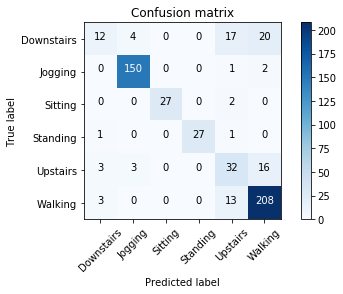

In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=classes,title='Confusion matrix')

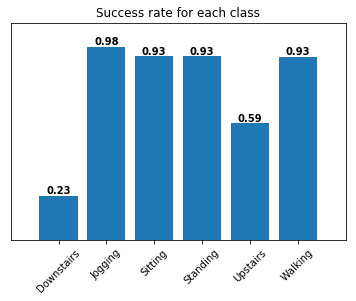

In [35]:
print_rates(cm, classes)

In [36]:
print('Multilayer Perceptron rate: %f' % np.mean(y_test == y_pred))

Multilayer Perceptron rate: 0.841328


# This neural net achieved 84% on the test set